In [1]:
import numpy as np
from numpy.lib.function_base import median
import pandas as pd
from scipy import stats
from sklearn.metrics import accuracy_score
import math

import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [17]:
gt = pd.read_csv("analysis/not_uploaded/AVA_gt.txt", sep=" ").drop(columns=["Unnamed: 0", "semanticTagID1", "semanticTagID2", "challengeID"])
ours = pd.read_csv("analysis/not_uploaded/NIMA_test_dist_AVA.csv", sep=";")
test_files = list(pd.read_csv("analysis/not_uploaded/AVA_test.csv")["file"])

ours["img"] = ours["img"].apply(lambda row: int(Path(row).stem))
ours["dist"] = ours["score"]
ours["score"] = ours["dist"].apply(lambda row: sum([val * (i + 1) for i, val in enumerate(eval(row))]))
ours["quality"] = ours["score"].apply(lambda row: 1 if row > 5 else 0)
ours = ours.drop(columns=["dist"])
ours = ours.set_index("img")

gt["votes"] = gt.apply(lambda row: sum(list(row)[1:]), axis=1)
gt["gt_score"] = gt.apply(lambda row: sum([val * (i + 1) for i, val in enumerate(list(row)[1:-1])]), axis=1)
gt["gt_score"] = gt.apply(lambda row: row.gt_score / row.votes, axis=1)
gt["gt_quality"] = gt["gt_score"].apply(lambda row: 1 if row > 5 else 0)
gt = gt.set_index("img")

df = gt.join(ours).dropna().drop_duplicates()[["gt_score", "score", "gt_quality", "quality"]]
df = df[df.index.isin(test_files)]
df

,gt_score,score,gt_quality,quality
img,,,,
75,5.898876,5.439582,1,1.0
101,3.415094,4.129515,0,0.0
168,5.248322,5.058172,1,1.0
187,5.653333,3.937354,1,0.0
227,2.910828,4.231030,0,0.0
...,...,...,...,...
957944,5.226804,5.030101,1,1.0
957953,4.607143,4.946162,0,0.0
958048,6.370968,6.195935,1,1.0


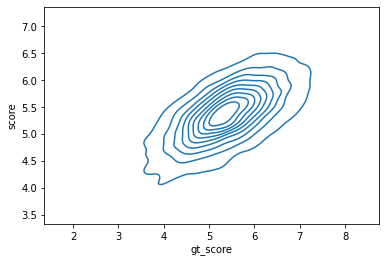

In [22]:
sns.kdeplot(data=df, x="gt_score", y="score")
#plt.xlim(0,10)
#plt.ylim(0,10)